# Палагутина Варвара итоговая работа

## Считаем и обработаем данные

In [1]:
import pandas as pd

Past Usage: (Прошлые использвания)

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samples are highly overlapped.  Further information is required
	to separate completely using affine combinations.  Other restrictions
	to data set examined.

   David Clark, Zoltan Schreter, Anthony Adams "A Quantitative Comparison of
   Dystal and Backpropagation", submitted to the Australian Conference on
   Neural Networks (ACNN'96). Data set treated as a 3-category classification
   problem (grouping ring classes 1-8, 9 and 10, and 11 on).

   -- Test set performance (3133 training, 1044 testing as above):
	64%    Backprop
	55%    Dystal
   -- Previous work (Waugh, 1995) on same data set:
	61.40% Cascade-Correlation (no hidden nodes)
	65.61% Cascade-Correlation (5 hidden nodes)
	59.2%  C4.5
	32.57% Linear Discriminate Analysis
	62.46% k=5 Nearest Neighbour

Relevant Information Paragraph: (Что можно предсказать)

   Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.

   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).

   Data comes from an original (non-machine-learning) study:

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)

(Перевод)

    Прогнозирование возраста морского ушка по физическим измерениям. Возраст морского ушка определяют, разрезая скорлупу через конус, окрашивая ее, и подсчитывать количество колец под микроскопом - скучно и трудоемкая задача. Другие измерения, которые легче получить, используется для предсказания возраста. Дополнительная информация, такая как погодные условия и местоположение (следовательно, доступность пищи) может потребоваться для решения проблемы.
    

In [2]:
df = pd.read_csv('abalone.csv') 

Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [3]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Внесем названия столбцов

In [5]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight",
                                      "Viscera weight", "Shell weight", "Rings"]

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df["Age"] = df["Rings"]+1.5

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


In [10]:
df.groupby(df.Rings).count()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Rings,,,,,,,,,
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,15,15,15,15,15,15,15,15,15
4,57,57,57,57,57,57,57,57,57
5,115,115,115,115,115,115,115,115,115
6,259,259,259,259,259,259,259,259,259
7,391,391,391,391,391,391,391,391,391
8,568,568,568,568,568,568,568,568,568
9,689,689,689,689,689,689,689,689,689


посмотрим значения и полумаем как можно отделить на группы, потому что предсказание для 30+ лет будет максимально неточное

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
 9   Age             4176 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.4+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4176.0,0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter,4176.0,0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height,4176.0,0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole weight,4176.0,0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked weight,4176.0,0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera weight,4176.0,0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell weight,4176.0,0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,4176.0,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000
Age,4176.0,11.432471,3.223601,2.5000,9.500000,10.50000,12.50000,30.5000


Распределим на 3 класса
Распределение примерное, так как основного такого нет

In [13]:
df["Class"] = 1
df.loc[df['Rings']<5, 'Class'] = 0
df.loc[df['Rings']>15, 'Class'] = 2
df["Class"]

0       1
1       1
2       1
3       1
4       1
       ..
4171    1
4172    1
4173    1
4174    1
4175    1
Name: Class, Length: 4176, dtype: int64

In [14]:
print(set(df['Class']))

{0, 1, 2}


In [15]:
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,5)

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
palette = sns.cubehelix_palette(as_cmap=True)

In [17]:
X, y = df.Age, df.Sex

C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estima

C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Barbara\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estima

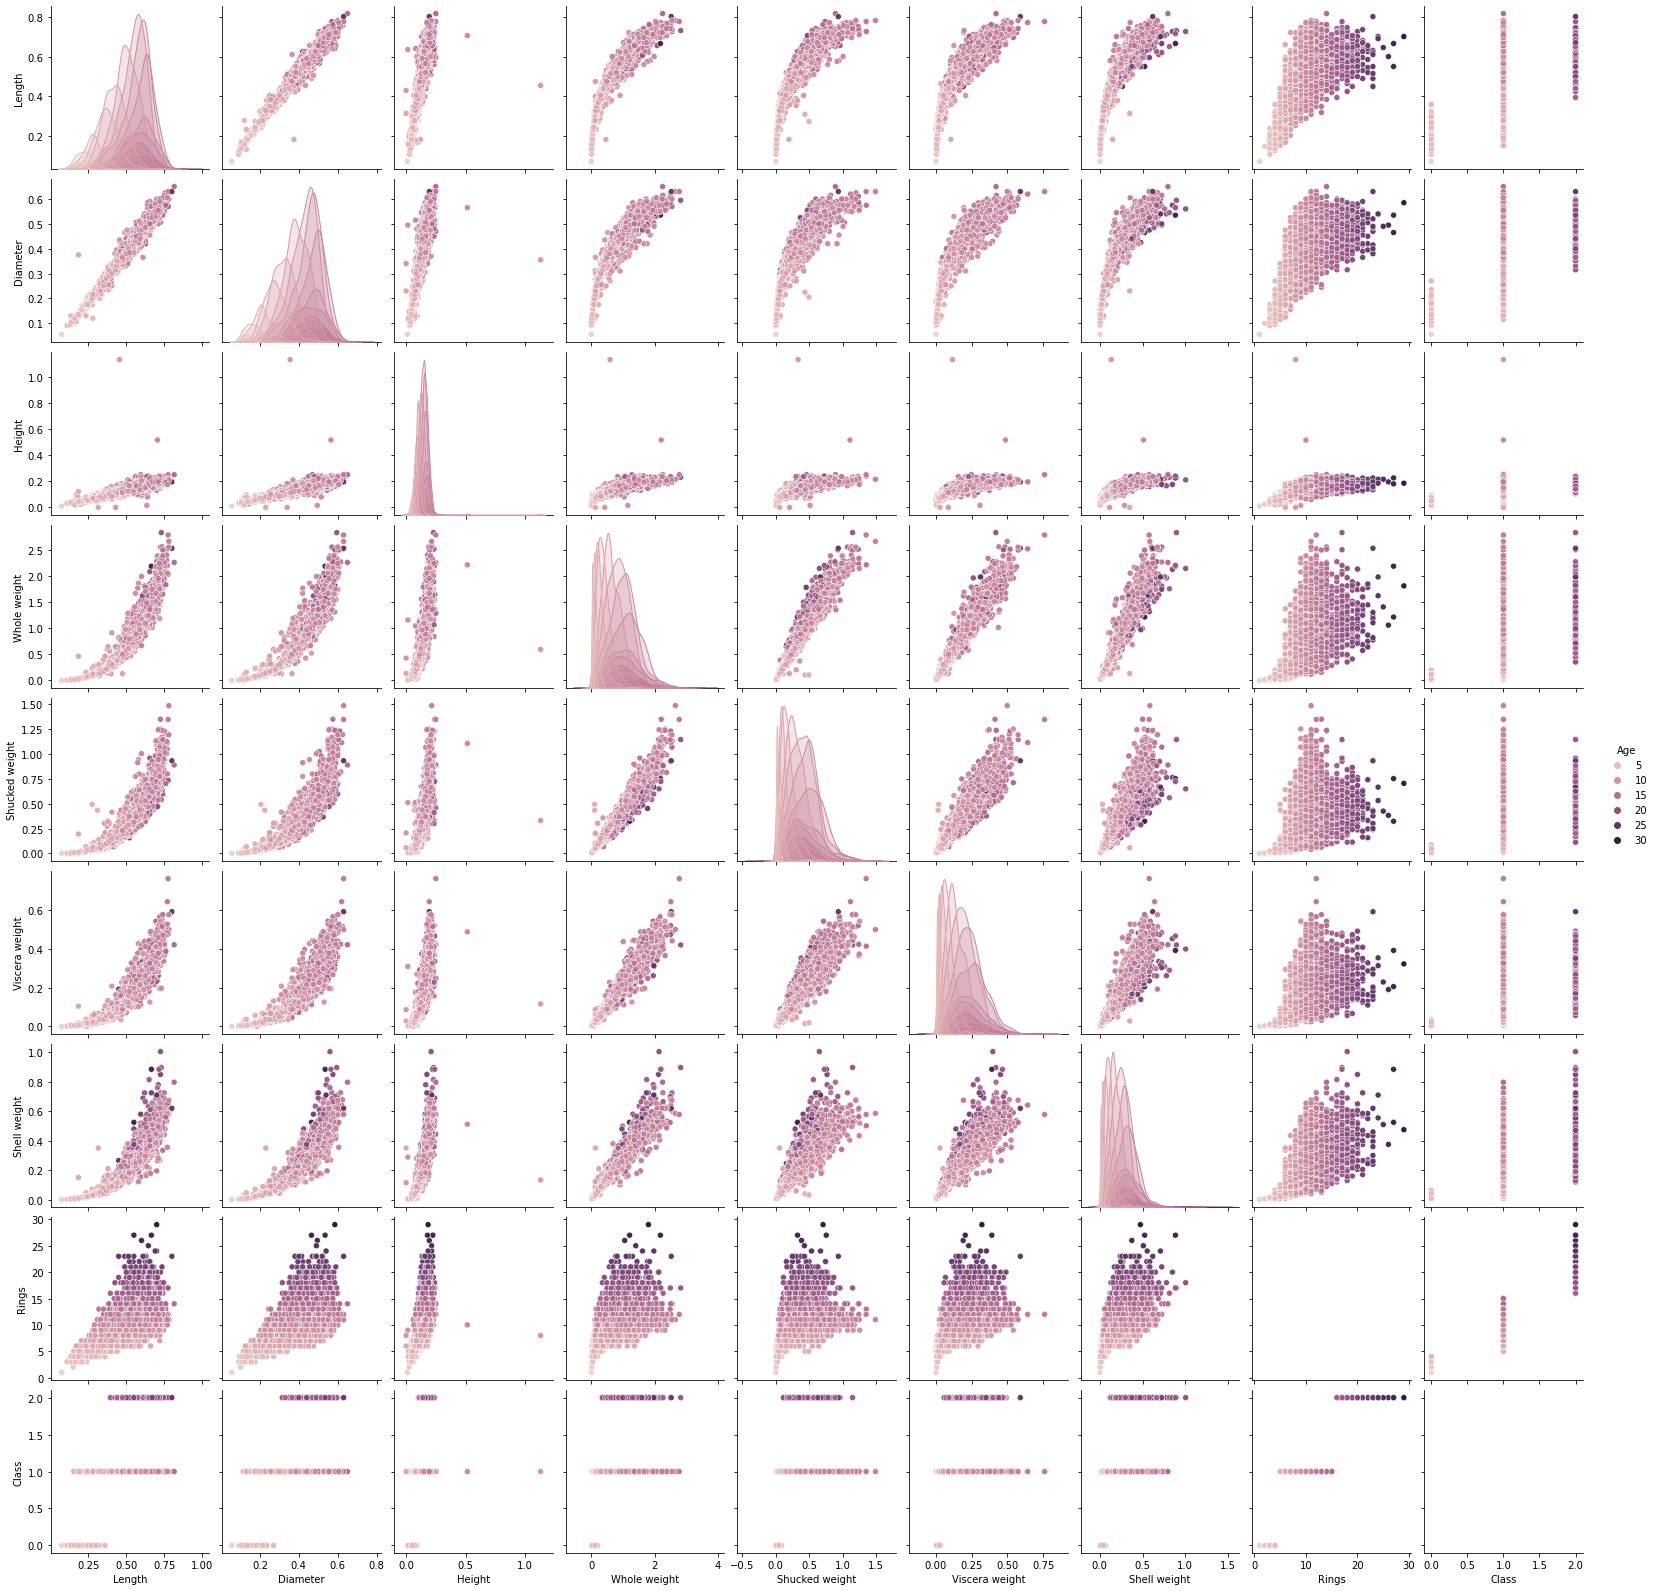

In [18]:
sns.pairplot(df, hue = 'Age')

In [19]:
#sns.pairplot(df, hue = 'Age', kind="reg")

In [20]:
#sns.pairplot(df, hue = 'Age', kind="hist")

In [21]:
df["Sex"]=df["Sex"].replace({'M':1,'F':2,'I':3}) #заменим тип на цифровые значения

In [22]:
df = df.drop('Age', axis=1) #удаляем ответы из значений

<AxesSubplot:>

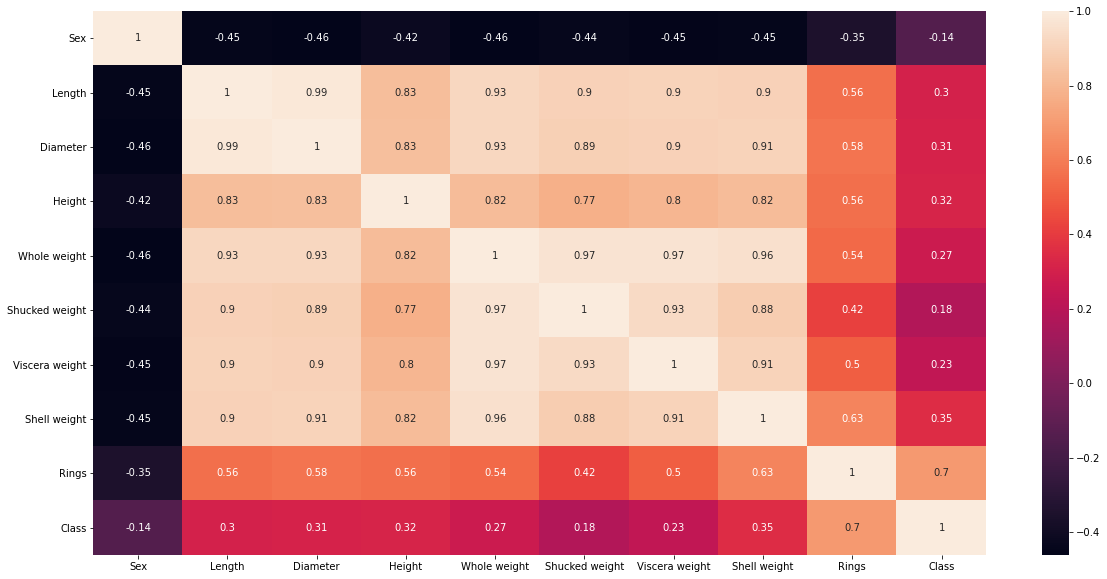

In [23]:
import seaborn as sns

plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

In [24]:
y = df['Class'] #целевая переменная, запоминаем ее

In [25]:
#df = df.drop('Age', axis=1) #удаляем ответы из значений
df = df.drop('Rings', axis=1) #удаляем ответы из значений
df = df.drop('Class', axis=1) #удаляем ответы из значений
X = df

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

print(X)

[[-1.15466873 -1.44900723 -1.43989229 ... -1.17096695 -1.20532696
  -1.21305408]
 [ 0.05352386  0.0498915   0.12201495 ... -0.46361041 -0.35684354
  -0.20727719]
 [-1.15466873 -0.69955786 -0.4322102  ... -0.64833409 -0.60773918
  -0.60240383]
 ...
 [-1.15466873  0.63279657  0.67624011 ...  0.74835715  0.97518418
   0.49676663]
 [ 0.05352386  0.84097695  0.77700832 ...  0.77313716  0.73341202
   0.41055718]
 [-1.15466873  1.54879024  1.48238578 ...  2.64064851  1.78717368
   1.84019719]]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Иерархические методы

In [28]:
from sklearn.tree import DecisionTreeClassifier #импортируем модель деревьев решений

In [29]:
model = DecisionTreeClassifier(random_state=123, min_samples_split=28) # инициализируем модель

In [30]:
model.fit(X_train, y_train)                    # обучаем модель
predicted_DecisionTreeClassifier = model.predict(X_test)              # делаем предсказание

In [31]:
from sklearn import metrics # импортируем метрики
print(metrics.classification_report(y_test, predicted_DecisionTreeClassifier)) # конечный результат для лучшей метрики

              precision    recall  f1-score   support

           0       0.59      0.42      0.49        24
           1       0.93      0.97      0.95      1144
           2       0.41      0.18      0.25        85

    accuracy                           0.91      1253
   macro avg       0.64      0.52      0.56      1253
weighted avg       0.89      0.91      0.90      1253



## Метод k-ближайших соседей

In [32]:
from sklearn.neighbors import KNeighborsClassifier #импортируем нашу модель

In [33]:
model = KNeighborsClassifier(
   n_neighbors=70, 
   weights='distance',
   algorithm='auto',
   leaf_size=30,
   metric='minkowski',
   metric_params=None,
   n_jobs=-1)

In [34]:
model.fit(X_train, y_train)                    # обучаем модель
predicted_KNeighborsClassifier = model.predict(X_test)      

In [35]:
print(metrics.classification_report(y_test, predicted_KNeighborsClassifier)) # конечный результат для лучшей метрики

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        24
           1       0.92      0.99      0.96      1144
           2       0.00      0.00      0.00        85

    accuracy                           0.92      1253
   macro avg       0.51      0.47      0.49      1253
weighted avg       0.85      0.92      0.88      1253



C:\Users\Barbara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.model_selection import GridSearchCV
model_params = model.get_params() #зададим параметры по которым и будем осуществлять поиск
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['n_neighbors'] = range(1, 70)
clf = GridSearchCV(KNeighborsClassifier(), tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [37]:
model = KNeighborsClassifier(**best_params)    # задаем найденные наилучшие параметры
model.fit(X_train, y_train)                    # обучаем модель
predicted_KNeighborsClassifier_best = model.predict(X_test)   

In [38]:
print(metrics.classification_report(y_test, predicted_KNeighborsClassifier_best)) # конечный результат для лучшей метрики

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        24
           1       0.92      0.99      0.96      1144
           2       0.67      0.02      0.05        85

    accuracy                           0.92      1253
   macro avg       0.74      0.48      0.50      1253
weighted avg       0.90      0.92      0.89      1253



## Метод опорных векторов

In [39]:
from sklearn import svm #импортируем модель

In [40]:
model = svm.SVC()

In [41]:
model.fit(X_train, y_train)                    # обучаем модель
predicted_svm = model.predict(X_test)     

In [42]:
print(metrics.classification_report(y_test, predicted_svm)) # конечный результат для лучшей метрики

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        24
           1       0.92      0.99      0.96      1144
           2       0.80      0.05      0.09        85

    accuracy                           0.92      1253
   macro avg       0.76      0.47      0.50      1253
weighted avg       0.91      0.92      0.89      1253



In [43]:
model_params = model.get_params() #зададим параметры по которым и будем осуществлять поиск
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['gamma'] = range(1, 70)
clf = GridSearchCV(model, tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [44]:
model = svm.SVC(**best_params)      # задаем найденные наилучшие параметры
model.fit(X_train, y_train)         # обучаем модель
predicted_svm_best = model.predict(X_test)   # делаем предсказание

In [45]:
print(metrics.classification_report(y_test, predicted_svm_best)) # конечный результат для лучшей метрики

              precision    recall  f1-score   support

           0       0.61      0.46      0.52        24
           1       0.92      0.99      0.96      1144
           2       0.67      0.05      0.09        85

    accuracy                           0.92      1253
   macro avg       0.73      0.50      0.52      1253
weighted avg       0.90      0.92      0.89      1253



## XGBoost

In [46]:
from xgboost import XGBRegressor 

In [47]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [48]:
predicted_xgb = xgb.predict(X_test)   # делаем предсказание

In [49]:
pred_xgb = np.asarray([abs(round(line, 0)) for line in predicted_xgb])
print ("accuracy score model: ", metrics.accuracy_score(pred_xgb, y_test))
print ("classification_report model:\n ", metrics.classification_report(pred_xgb, y_test))

accuracy score model:  0.9090183559457302
classification_report model:
                precision    recall  f1-score   support

         0.0       0.46      0.58      0.51        19
         1.0       0.97      0.93      0.95      1190
         2.0       0.21      0.41      0.28        44

    accuracy                           0.91      1253
   macro avg       0.55      0.64      0.58      1253
weighted avg       0.94      0.91      0.92      1253



## Итоги:

Самое лучшее предсказание значений было построено при помощи "Метода опорных векторов". Однако данные изначально были собраны для нейронных сетей, поэтому при помощи машинного обучения очень хорошие значения получить невозможно. Если бы у нас был более большой датафрейм, то из него можно было бы получить еще значения, в нашем же случае самое лучшее предсказание происходит именно для средней группы, где больше всего значений. Если бы у нас было бы для каждого возраста ракушек по столько значений, то можно было бы предсказать гораздо лучшее значения. (Самое лучшее, что у меня получилось, это 23%, что максимально плохо)